# Multivariate Linear Regression Analysis Example

Using data extracted from the SciKitLearn module

Performs a multilinear regression analysis on the variables in the data set

Cross validates the accuracy of the regression 

In [28]:
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt

# Load the data set from sklearn
from sklearn.datasets import load_boston
boston = load_boston()

# Convert from the specialized format into a DataFrame for more general function usage
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df['Price'] = boston.target

In [29]:
# Import the linear regression tools from sklearn
import sklearn
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

In [30]:
X_multi = boston_df.drop('Price', 1)
Y_target = boston_df.Price

lreg.fit(X_multi, Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
print ' The estimated intercept coefficient is %.2f ' % lreg.intercept_
print ' The number of coefficients used was %d' % len(lreg.coef_)

 The estimated intercept coefficient is 36.49 
 The number of coefficients used was 13


In [32]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

coeff_df['Coefficient Estimate'] = Series(lreg.coef_)

coeff_df

Features  Coefficient Estimate
0      CRIM             -0.107171
1        ZN              0.046395
2     INDUS              0.020860
3      CHAS              2.688561
4       NOX            -17.795759
5        RM              3.804752
6       AGE              0.000751
7       DIS             -1.475759
8       RAD              0.305655
9       TAX             -0.012329
10  PTRATIO             -0.953464
11        B              0.009393
12    LSTAT             -0.525467
13    Price                   NaN

In [35]:
# Break up data into training and test sets
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_multi, boston_df.Price)

# Calculate the fit
lreg = LinearRegression()
lreg.fit(X_train, Y_train)

# Make predictions
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

# Calculate error
print " Fit a model X_train, and calculate the RMSE with Y_train: %.2f " % np.sqrt(np.mean((Y_train - pred_train) ** 2))
print " Fit a model X_train, and calculate the RMSE with X_test and Y_test: %.2f " % np.sqrt(np.mean((Y_test - pred_test) ** 2))

 Fit a model X_train, and calculate the RMSE with Y_train: 4.70 
 Fit a model X_train, and calculate the RMSE with X_test and Y_test: 4.71 


Text(0.5,1,u'Residual Plots')

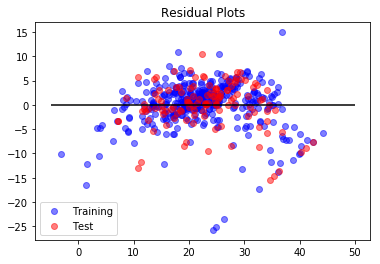

In [36]:
# Now do a residuals plot to test for any structure in the error

train = plt.scatter(pred_train, (pred_train - Y_train), c='b', alpha = 0.5)
test = plt.scatter(pred_test, (pred_test - Y_test), c = 'r', alpha = 0.5)
plt.hlines(y = 0, xmin = -5, xmax = 50)

plt.legend((train, test), ('Training', 'Test'), loc = 'lower left')
plt.title('Residual Plots')